In [51]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn import metrics
from sklearn.svm import LinearSVC, SVC
from sklearn.model_selection import KFold
from sklearn import metrics


In [52]:
csv_data = pd.read_csv('database.csv')

In [53]:
csv_data = csv_data.drop('Unnamed: 0',axis = 1)   #消除第0行

In [54]:
'''label_name = {
    0:'success',
    1:'fail',
    2:'noExtusion'
}

csv_data['label'] = csv_data['label'].map(label_name)   #將label的0 1 2置換成列印狀態
'''
csv_data

,HG_mostNum,HG_std,HG_val,HG_entropy,GLCM_asm,GLCM_contrast,GLCM_entropt,GLCM_idm,label
0,91,43.241089,0.567264,5.664850,0.606771,0.041667,0.703857,0.979167,0
1,93,39.994205,0.516262,5.246231,0.643667,0.043478,0.662506,0.978261,0
2,88,39.861607,0.513090,5.051593,0.648104,0.043478,0.657010,0.978261,0
3,92,40.643448,0.525302,5.139467,0.643667,0.043478,0.662506,0.978261,0
4,90,43.750767,0.594056,5.539417,0.571996,0.045290,0.751167,0.977355,0
5,93,39.190777,0.489991,5.172386,0.648104,0.043478,0.657010,0.978261,0
6,93,45.541195,0.596474,5.755230,0.588906,0.043478,0.728203,0.978261,0
7,93,34.259499,0.411603,5.098289,0.713145,0.043478,0.572880,0.978261,0
8,14,2.194813,0.155902,2.628523,1.000000,0.000000,0.000000,1.000000,0
9,14,2.199826,0.161455,2.615767,1.000000,0.000000,0.000000,1.000000,0


In [55]:
# 判斷是否重複
csv_data.duplicated()
#移除重複數據
csv_data = csv_data.drop_duplicates()
csv_data

,HG_mostNum,HG_std,HG_val,HG_entropy,GLCM_asm,GLCM_contrast,GLCM_entropt,GLCM_idm,label
0,91,43.241089,0.567264,5.664850,0.606771,0.041667,0.703857,0.979167,0
1,93,39.994205,0.516262,5.246231,0.643667,0.043478,0.662506,0.978261,0
2,88,39.861607,0.513090,5.051593,0.648104,0.043478,0.657010,0.978261,0
3,92,40.643448,0.525302,5.139467,0.643667,0.043478,0.662506,0.978261,0
4,90,43.750767,0.594056,5.539417,0.571996,0.045290,0.751167,0.977355,0
5,93,39.190777,0.489991,5.172386,0.648104,0.043478,0.657010,0.978261,0
6,93,45.541195,0.596474,5.755230,0.588906,0.043478,0.728203,0.978261,0
7,93,34.259499,0.411603,5.098289,0.713145,0.043478,0.572880,0.978261,0
8,14,2.194813,0.155902,2.628523,1.000000,0.000000,0.000000,1.000000,0
9,14,2.199826,0.161455,2.615767,1.000000,0.000000,0.000000,1.000000,0


In [56]:
display(csv_data.describe())      #使用describe()函數查看每一列的描述性統計量

,HG_mostNum,HG_std,HG_val,HG_entropy,GLCM_asm,GLCM_contrast,GLCM_entropt,GLCM_idm,label
count,4640.000000,4640.000000,4640.000000,4640.000000,4640.000000,4640.000000,4640.000000,4640.000000,4640.000000
mean,65.070474,28.921902,0.519738,4.906862,0.664083,0.089663,0.701321,0.955251,0.498491
std,59.001843,24.290026,0.441168,1.273305,0.278056,0.085776,0.572519,0.042806,0.560231
min,1.000000,1.690731,0.035913,2.246129,0.167152,0.000000,0.000000,0.809783,0.000000
25%,15.000000,5.581929,0.169533,3.735136,0.411547,0.000000,0.000000,0.923913,0.000000
50%,19.000000,22.284654,0.307229,5.170796,0.628045,0.081522,0.777800,0.959239,0.000000
75%,129.000000,50.031153,0.823431,5.856093,1.000000,0.152174,1.177143,1.000000,1.000000
max,167.000000,94.845390,1.653756,7.197640,1.000000,0.380435,1.864080,1.000000,2.000000


###  進行validation 將資料分為五等分    其中四等拿來train 一等拿來test  ,故可訓練出五種分類器

In [57]:
k_fold = KFold(n_splits=5, shuffle=True, random_state=0)
model = SVC(C = 1.0 ,kernel = 'rbf' ,random_state=0)
Features = csv_data.drop('label',axis=1)
Label = csv_data['label']

In [58]:
accuracies = []
confmats = []
for train_index, test_index in k_fold.split(Label):
    #print(np.shape(test_index))
    #print(np.shape(train_index))
    trained = model.fit(Features.loc[train_index].values, Label.loc[train_index].values)
    X_test = Features.loc[test_index].values
    y_test = Label.loc[test_index].values
    accuracies.append(trained.score(X_test, y_test))
    y_pred = model.predict(X_test)
    confmats.append(metrics.confusion_matrix(y_test, y_pred))
    

In [59]:
accuracies  #五個模型的準確度

[0.9353448275862069,
 0.9321120689655172,
 0.9525862068965517,
 0.9407327586206896,
 0.9439655172413793]

In [60]:
acc = np.array(accuracies)
print("平均值 = {:f}".format(np.average(acc)))              #沒有作特徵判斷的話  0.941756
print("標準差 = {:f}".format(np.std(acc)))                  #                  0.006991

平均值 = 0.940948
標準差 = 0.007128


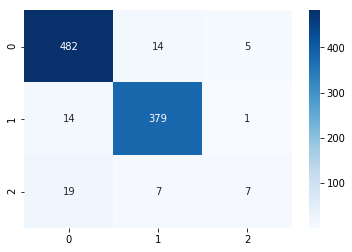

In [61]:
sns.heatmap(confmats[0], cmap="Blues", annot=True, fmt="d")

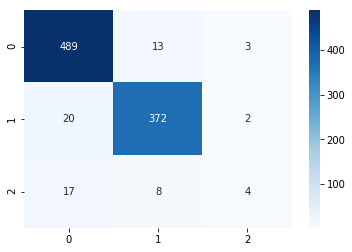

In [62]:
sns.heatmap(confmats[1], cmap="Blues", annot=True, fmt="d")

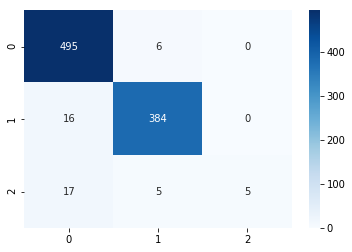

In [63]:
sns.heatmap(confmats[2], cmap="Blues", annot=True, fmt="d")

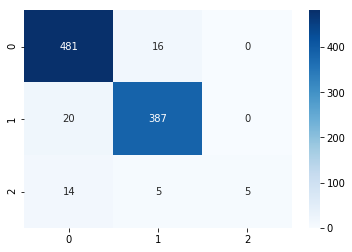

In [64]:
sns.heatmap(confmats[3], cmap="Blues", annot=True, fmt="d")

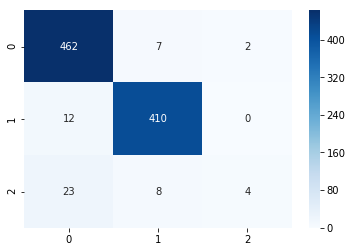

In [65]:
sns.heatmap(confmats[4], cmap="Blues", annot=True, fmt="d")

## 探索資料

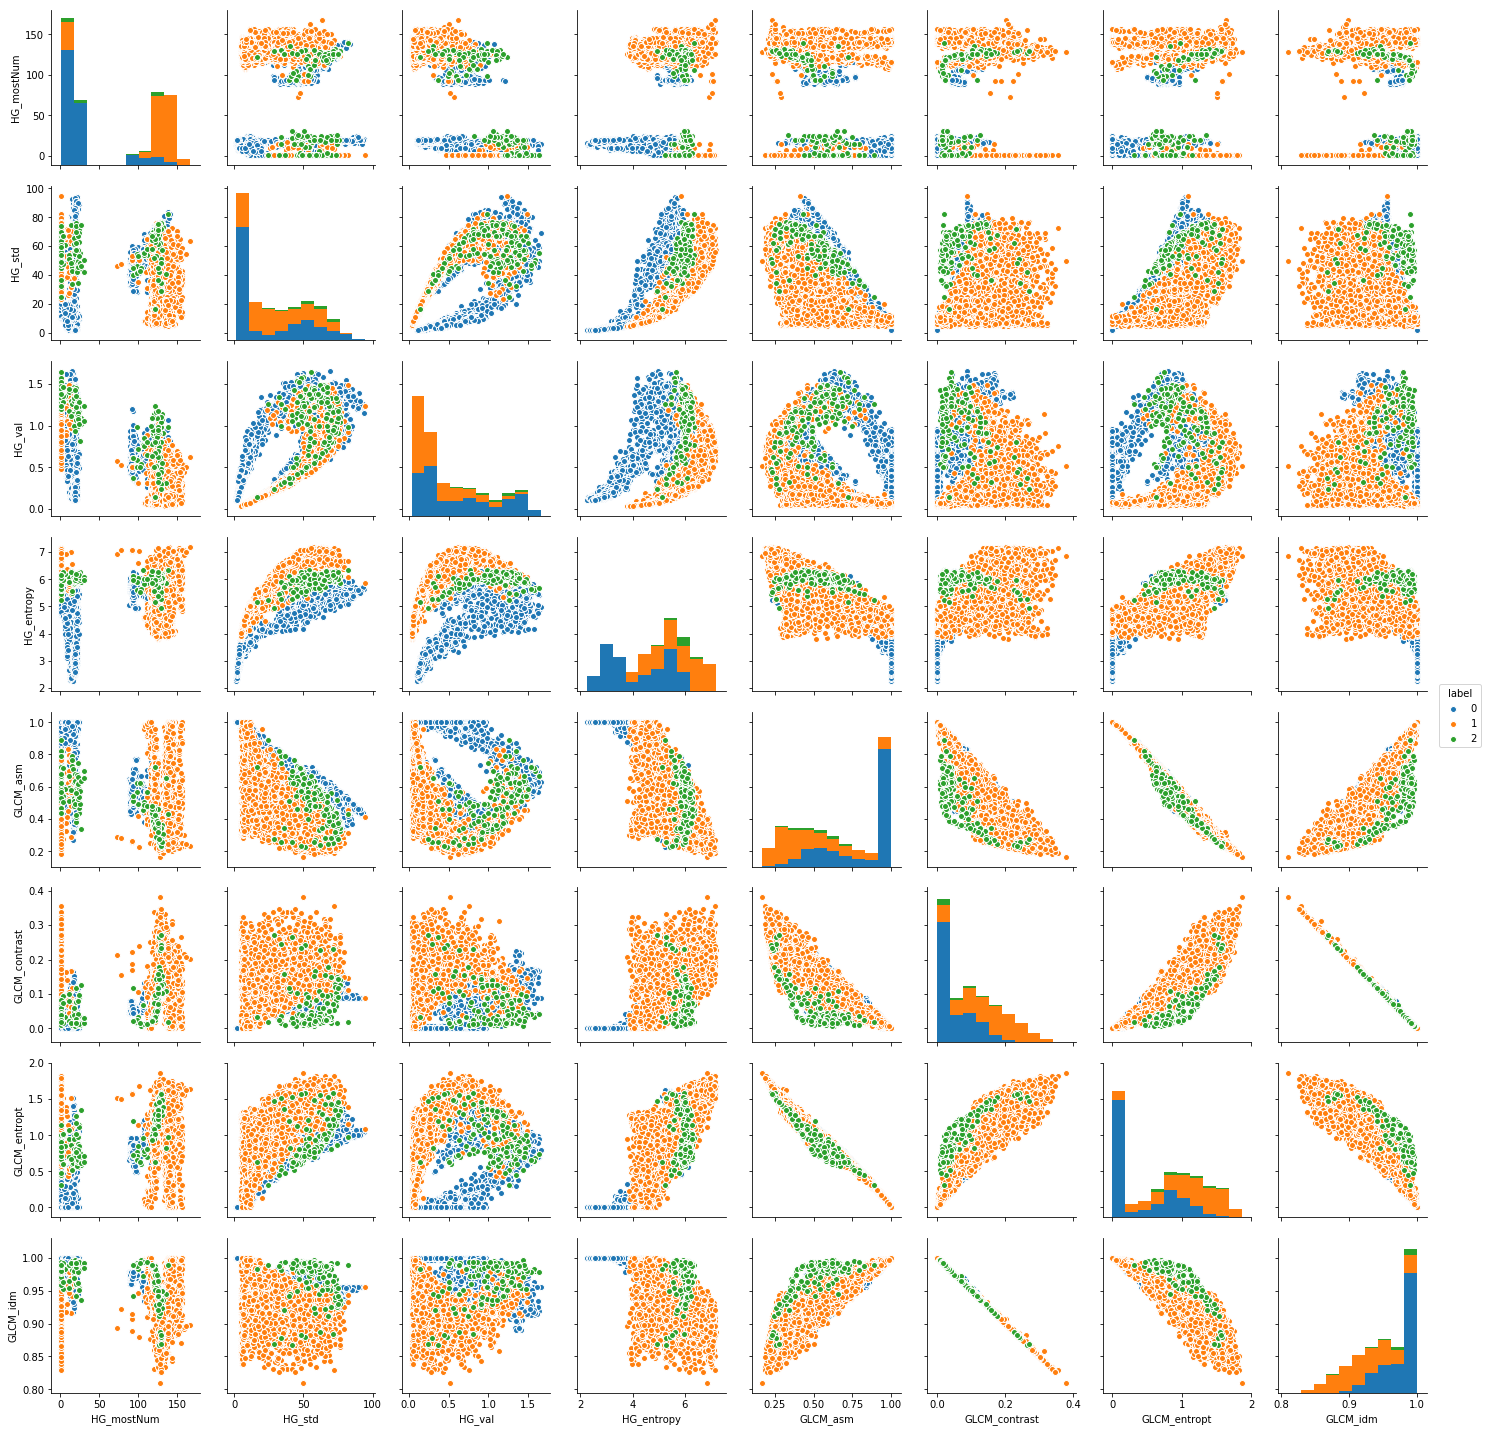

In [66]:
show_features = ["HG_mostNum", "HG_std", "HG_val", "HG_entropy","GLCM_asm","GLCM_contrast","GLCM_entropt","GLCM_idm"]
sns.pairplot(data=csv_data, hue="label", x_vars=show_features, y_vars=show_features)

### 挑選了有辦法肉眼分類的特徵來當作我們訓練用的特徵 :  HG_entropy於HG_std , HG_val(可肉眼分三類)
###            分1跟2兩類的特徵(代表1類可能事範圍極小的圓)，並且去掉重複的: GLCM的asm和entropy於idm 

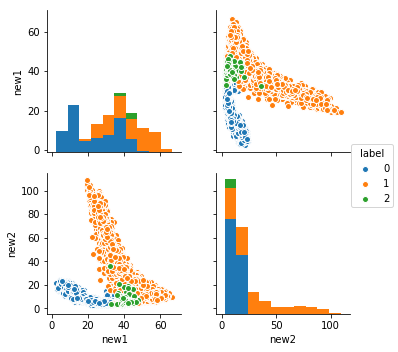

In [67]:
#將這兩種結合創造新的特徵看可否明顯地分出三類
#csv_data['new1'] = csv_data["HG_entropy"] / csv_data["GLCM_idm"]             0.951
#csv_data['new2'] = csv_data["HG_entropy"] / csv_data["HG_val"]

csv_data['new1'] = 10*csv_data["HG_entropy"] / csv_data["GLCM_idm"]-20      # 0.953
csv_data['new2'] = csv_data["HG_entropy"] / csv_data["HG_val"]
show_features = ["new1", "new2"]
sns.pairplot(data=csv_data, hue="label", x_vars=show_features, y_vars=show_features)

In [68]:
#可明顯分離正常狀態k_fold = KFold(n_splits=5, shuffle=True, random_state=0)
model = SVC(C = 1.0 ,kernel = 'rbf',random_state=0)
features = ['new1','new2']
Features = csv_data[features]
Label = csv_data['label']


In [69]:
accuracies = []
confmats = []
for train_index, test_index in k_fold.split(Label):
    #print(np.shape(test_index))
    #print(np.shape(train_index))
    trained = model.fit(Features.loc[train_index].values, Label.loc[train_index].values)
    X_test = Features.loc[test_index].values
    y_test = Label.loc[test_index].values
    accuracies.append(trained.score(X_test, y_test))
    y_pred = model.predict(X_test)
    confmats.append(metrics.confusion_matrix(y_test, y_pred))

In [70]:
accuracies

[0.9547413793103449,
 0.9568965517241379,
 0.9525862068965517,
 0.9568965517241379,
 0.9525862068965517]

In [71]:
acc = np.array(accuracies)
print("平均值 = {:f}".format(np.average(acc)))              #0.953747
print("標準差 = {:f}".format(np.std(acc)))                  #0.003545

平均值 = 0.954741
標準差 = 0.001928


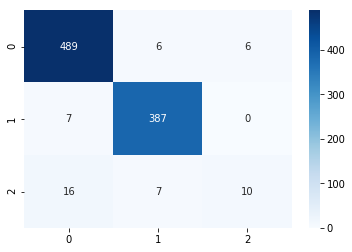

In [72]:
sns.heatmap(confmats[0], cmap="Blues", annot=True, fmt="d")

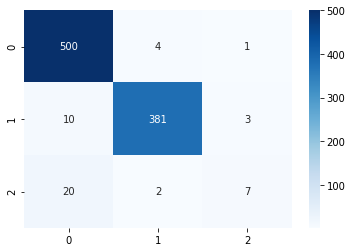

In [73]:
sns.heatmap(confmats[1], cmap="Blues", annot=True, fmt="d")

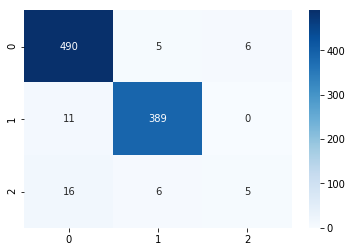

In [74]:
sns.heatmap(confmats[2], cmap="Blues", annot=True, fmt="d")

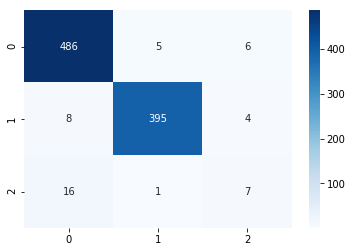

In [75]:
sns.heatmap(confmats[3], cmap="Blues", annot=True, fmt="d")

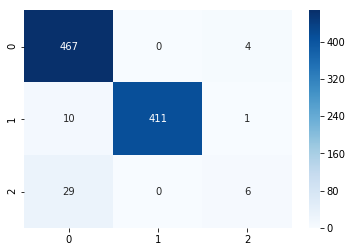

In [76]:
sns.heatmap(confmats[4], cmap="Blues", annot=True, fmt="d")